In [2]:
import pandas as pd
import os

## Unique TCR und Epitope

In [21]:
pipeline_data = '../../../../data'
pipeline_data_plain = f'{pipeline_data}/plain_datasets'
pipeline_data_cleaned = f'{pipeline_data}/cleaned_datasets'
pipeline_data_concatenated = f'{pipeline_data}/concatenated_datasets'
pipeline_data_splitted = f'{pipeline_data}/splitted_datasets'
pipeline_data_temp_bucket = f'{pipeline_data}/temp'
precision = "allele"

train_file = f'{pipeline_data_splitted}/{precision}/beta/train.tsv'
validation_file = f'{pipeline_data_splitted}/{precision}/beta/validation.tsv'
test_file = f'{pipeline_data_splitted}/{precision}/beta/test.tsv'

# Dateien einlesen
train_df = pd.read_csv(train_file, sep='\t')
val_df = pd.read_csv(validation_file, sep='\t')
test_df = pd.read_csv(test_file, sep='\t')

# Funktion zur Analyse
def analyze(df, name):
    print(f'\n== {name.upper()} ==')
    print(f'Unique TCRs: {df["TRB_CDR3"].nunique()}')
    print(f'Unique epitopes: {df["Epitope"].nunique()}')

    if 'task' in df.columns:
        print('\nUnique TCRs by task:')
        print(df.groupby('task')['TRB_CDR3'].nunique())

        print('\nUnique epitopes by task:')
        print(df.groupby('task')['Epitope'].nunique())

    if 'source' in df.columns:
        print('\nUnique TCRs by source:')
        print(df.groupby('source')['TRB_CDR3'].nunique())

        print('\nUnique epitopes by source:')
        print(df.groupby('source')['Epitope'].nunique())

# Analyse für jede Datei
analyze(train_df, "train")
analyze(val_df, "validation")
analyze(test_df, "test")

/tmp/ipykernel_1988/3073727823.py:14: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_file, sep='\t')
/tmp/ipykernel_1988/3073727823.py:15: DtypeWarning: Columns (1,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  val_df = pd.read_csv(validation_file, sep='\t')



== TRAIN ==
Unique TCRs: 199504
Unique epitopes: 993

Unique TCRs by task:
Series([], Name: TRB_CDR3, dtype: int64)

Unique epitopes by task:
Series([], Name: Epitope, dtype: int64)

Unique TCRs by source:
source
10X           77954
dataset      125750
generated    125917
Name: TRB_CDR3, dtype: int64

Unique epitopes by source:
source
10X           49
dataset      979
generated    885
Name: Epitope, dtype: int64

== VALIDATION ==
Unique TCRs: 68580
Unique epitopes: 1455

Unique TCRs by task:
task
TPP1    62706
TPP2     3493
TPP3     2369
TPP4       57
Name: TRB_CDR3, dtype: int64

Unique epitopes by task:
task
TPP1    681
TPP2    334
TPP3    760
TPP4    169
Name: Epitope, dtype: int64

Unique TCRs by source:
source
10X          50389
dataset      25826
generated    27370
Name: TRB_CDR3, dtype: int64

Unique epitopes by source:
source
10X            49
dataset      1443
generated    1241
Name: Epitope, dtype: int64

== TEST ==
Unique TCRs: 22189
Unique epitopes: 304

Unique TCRs by tas

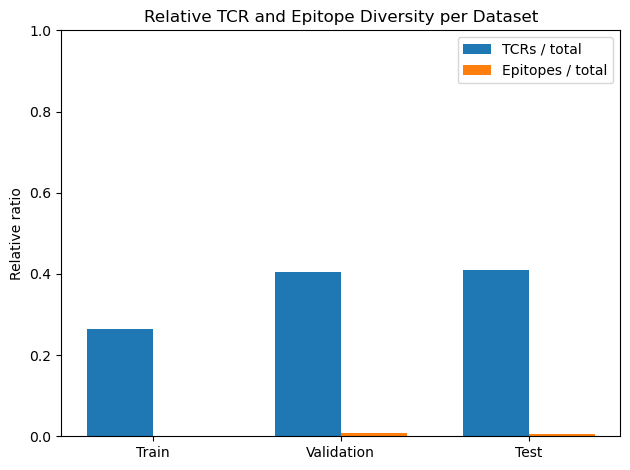

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Stats
datasets = {
    'Train': train_df,
    'Validation': val_df,
    'Test': test_df
}

ratios_tcr = []
ratios_epi = []
total_counts = []

for name, df in datasets.items():
    total = len(df)
    tcr_ratio = df["TRB_CDR3"].nunique() / total
    epi_ratio = df["Epitope"].nunique() / total
    total_counts.append(total)
    ratios_tcr.append(tcr_ratio)
    ratios_epi.append(epi_ratio)

# Plot
labels = list(datasets.keys())
x = range(len(labels))
width = 0.35

plt.bar(x, ratios_tcr, width=width, label='TCRs / total')
plt.bar([i + width for i in x], ratios_epi, width=width, label='Epitopes / total')

plt.xticks([i + width/2 for i in x], labels)
plt.ylabel('Relative ratio')
plt.title('Relative TCR and Epitope Diversity per Dataset')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

🔍 total 10X Train: 316157 davon uique: 77954
🔍 total dataset Train: 126286 davon uique: 125750
🔍 total generated Train: 313315 davon uique: 125917
🔍 total 10X Validation: 79435 davon uique: 50389
🔍 total dataset Validation: 28150 davon uique: 25826
🔍 total generated Validation: 61444 davon uique: 27370
🔍 total 10X Test: 15707 davon uique: 14201
🔍 total dataset Test: 8731 davon uique: 8359
🔍 total generated Test: 29688 davon uique: 5972


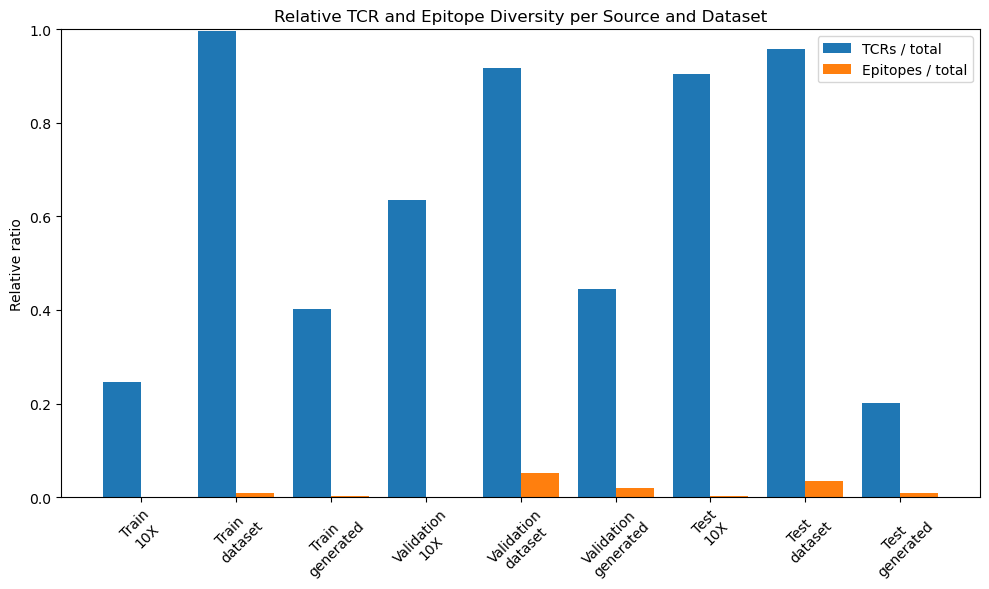

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

datasets = {
    'Train': train_df,
    'Validation': val_df,
    'Test': test_df
}

results = []

for name, df in datasets.items():
    for source in df['source'].dropna().unique():
        subset = df[df['source'] == source]
        total = len(subset)
        unique_total = len(subset["TRB_CDR3"].value_counts())
        print(f"🔍 total {source} {name}: {total} davon uique: {unique_total}")
        if total == 0:
            continue
        tcr_ratio = subset["TRB_CDR3"].nunique() / total
        epi_ratio = subset["Epitope"].nunique() / total
        results.append({
            'Dataset': name,
            'Source': source,
            'TCRs / total': tcr_ratio,
            'Epitopes / total': epi_ratio
        })

# In DataFrame umwandeln
ratio_df = pd.DataFrame(results)

# Plotten
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(ratio_df))
bar_width = 0.4

ax.bar([i - bar_width/2 for i in x], ratio_df['TCRs / total'], width=bar_width, label='TCRs / total')
ax.bar([i + bar_width/2 for i in x], ratio_df['Epitopes / total'], width=bar_width, label='Epitopes / total')

ax.set_xticks(x)
ax.set_xticklabels([f"{r['Dataset']}\n{r['Source']}" for _, r in ratio_df.iterrows()], rotation=45)
ax.set_ylabel("Relative ratio")
ax.set_ylim(0, 1)
ax.set_title("Relative TCR and Epitope Diversity per Source and Dataset")
ax.legend()
plt.tight_layout()
plt.show()

## Unterschiedliche Epitope und TCR genauer analysiert

In [7]:
# Wie viele verschiedene TCRs pro Epitope im Training?
tcrs_per_epitope = train_df.groupby("Epitope")["TRB_CDR3"].nunique()
tcrs_per_epitope.describe()

count      993.000000
mean       761.085599
std       3030.043023
min          1.000000
25%          3.000000
50%          7.000000
75%        119.000000
max      47208.000000
Name: TRB_CDR3, dtype: float64

In [11]:
bind_counts = train_df.groupby(["Epitope", "Binding"])["TRB_CDR3"].nunique().unstack(fill_value=0)
bind_counts.columns = ["non_binders", "binders"]
bind_counts["total"] = bind_counts.sum(axis=1)
bind_counts["binder_ratio"] = bind_counts["binders"] / bind_counts["total"]

# Beispielausgabe für Top-Binder
print(bind_counts.sort_values("binders", ascending=False).head(10))

                           non_binders  binders  total  binder_ratio
Epitope                                                             
MIELSLIDFYLCFLAFLLFLVLIML        36176    11032  47208      0.233689
YVLDHLIVV                        22739     8340  31079      0.268348
GLCTLVAML                        36743     7033  43776      0.160659
HTTDPSFLGRY                       7884     5521  13405      0.411861
GILGFVFTL                        18848     4926  23774      0.207201
NLVPMVATV                        13941     4702  18643      0.252213
FLWLLWPVTLACFVLAAV               13327     3594  16921      0.212399
SEHDYQIGGYTEKW                    6927     3322  10249      0.324129
MGYINVFAFPFTIYSL                 10039     2678  12717      0.210584
FVDGVPFVV                         2915     2536   5451      0.465236


In [8]:
# Wie viele verschiedene TCRs pro Epitope im Validation?
tcrs_per_epitope = val_df.groupby("Epitope")["TRB_CDR3"].nunique()
tcrs_per_epitope.describe()

count     1455.000000
mean       115.468729
std        615.483071
min          1.000000
25%          3.000000
50%          8.000000
75%         22.000000
max      14683.000000
Name: TRB_CDR3, dtype: float64

In [9]:
# Wie viele verschiedene TCRs pro Epitope im Test?
tcrs_per_epitope = test_df.groupby("Epitope")["TRB_CDR3"].nunique()
tcrs_per_epitope.describe()

count     304.000000
mean      177.940789
std       465.444955
min         1.000000
25%         6.750000
50%        18.000000
75%       200.000000
max      4508.000000
Name: TRB_CDR3, dtype: float64

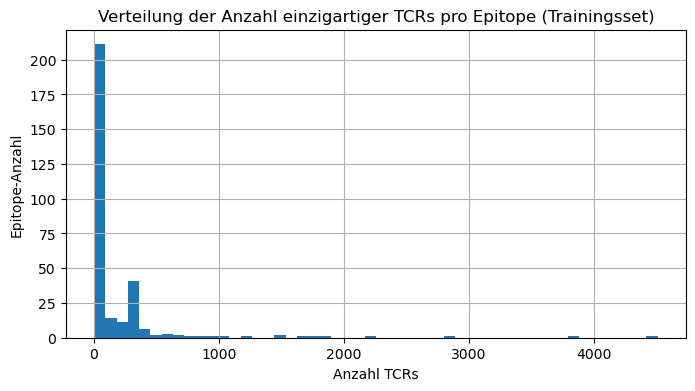

Epitope mit meisten TCRs:
Epitope
ELAGIGILTV    4508
KLGGALQAK     3862
GLCTLVAML     2834
CINGVCWTV     2226
NLVPMVATV     1821
AVFDRKSDAK    1728
KRWIILGLNK    1690
GTSGSPIVNR    1495
GTSGSPIINR    1447
GILGFVFTL     1179
Name: TRB_CDR3, dtype: int64


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
tcrs_per_epitope.hist(bins=50)
plt.title("Verteilung der Anzahl einzigartiger TCRs pro Epitope (Trainingsset)")
plt.xlabel("Anzahl TCRs")
plt.ylabel("Epitope-Anzahl")
plt.show()

# Extrembeispiele
print("Epitope mit meisten TCRs:")
print(tcrs_per_epitope.sort_values(ascending=False).head(10))

In [141]:
pipeline_data = '../../../../data'
pipeline_data_plain = f'{pipeline_data}/plain_datasets'
pipeline_data_cleaned = f'{pipeline_data}/cleaned_datasets'
pipeline_data_concatenated = f'{pipeline_data}/concatenated_datasets'
pipeline_data_splitted = f'{pipeline_data}/splitted_datasets'
pipeline_data_temp_bucket = f'{pipeline_data}/temp'
precision = "allele"

import pandas as pd

train_file = f'{pipeline_data_splitted}/{precision}/beta/new/train.tsv'
validation_file = f'{pipeline_data_splitted}/{precision}/beta/new/validation.tsv'
test_file = f'{pipeline_data_splitted}/{precision}/beta/new/test.tsv'

# Helper-Funktion
def count_unique_epitopes(file_path, split_name):
    df = pd.read_csv(file_path, sep='\t')
    df['split'] = split_name
    return df.groupby('Binding')['Epitope'].nunique().reset_index(name='unique_epitopes').assign(split=split_name)

# Ergebnisse sammeln
results = pd.concat([
    count_unique_epitopes(train_file, 'train'),
    count_unique_epitopes(validation_file, 'val'),
    count_unique_epitopes(test_file, 'test')
])

# Umstrukturieren für bessere Übersicht
summary = results.pivot(index='split', columns='Binding', values='unique_epitopes').rename(columns={0: 'non-binding', 1: 'binding'}).fillna(0).astype(int)

print(summary)


/tmp/ipykernel_149709/566910811.py:17: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


Binding  non-binding  binding
split                        
test             292      293
train            899      979
val             1255     1443


/tmp/ipykernel_149709/566910811.py:17: DtypeWarning: Columns (1,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


In [3]:
import pandas as pd

train_file = f'{pipeline_data_splitted}/{precision}/beta/new/train.tsv'
validation_file = f'{pipeline_data_splitted}/{precision}/beta/new/validation.tsv'
test_file = f'{pipeline_data_splitted}/{precision}/beta/new/test.tsv'

# Einlesen
df_train = pd.read_csv(train_file, sep='\t')
df_val = pd.read_csv(validation_file, sep='\t')
df_test = pd.read_csv(test_file, sep='\t')

# Schritt 1: Übersicht pro Task & Source (nur Negative)
def negative_overview(df, name):
    negatives = df[df['Binding'] == 0]
    overview = negatives.groupby(['task', 'source']).size().reset_index(name='count')
    print(f"\nNegative Verteilung in {name}:")
    print(overview)
    return overview

def negative_overview2(df, name):
    negatives = df[df['Binding'] == 0]
    overview = negatives.groupby(['source']).size().reset_index(name='count')
    print(f"\nNegative Verteilung in {name}:")
    print(overview)
    return overview
    
neg_overview_train = negative_overview2(df_train, 'Train')
neg_overview_val = negative_overview(df_val, 'Validation')
neg_overview_test = negative_overview(df_test, 'Test')

# Schritt 2: Verhältnis Pos/Neg in Validation bestimmen
val_stats = df_val.groupby('task')['Binding'].value_counts().unstack().fillna(0)
val_stats['binder_ratio'] = val_stats[1] / (val_stats[0] + val_stats[1])
val_stats['nonbinder_ratio'] = val_stats[0] / (val_stats[0] + val_stats[1])

# Schritt 3: Für Test - neue gewünschte Anzahl an Negativen berechnen
test_stats = df_test.groupby('task')['Binding'].value_counts().unstack().fillna(0)
needed_negatives = {}

for task in test_stats.index:
    num_positive = test_stats.loc[task, 1] if 1 in test_stats.columns else 0
    binder_ratio_val = val_stats.loc[task, 'binder_ratio']
    if binder_ratio_val > 0:
        needed_total = num_positive / binder_ratio_val
        needed_negative = int(round(needed_total - num_positive))
        needed_negatives[task] = needed_negative
    else:
        needed_negatives[task] = 0

/tmp/ipykernel_187311/3913806595.py:8: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train_file, sep='\t')
/tmp/ipykernel_187311/3913806595.py:9: DtypeWarning: Columns (1,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_val = pd.read_csv(validation_file, sep='\t')



Negative Verteilung in Train:
      source   count
0        10X  316157
1  generated  313315

Negative Verteilung in Validation:
   task     source  count
0  TPP1        10X  78164
1  TPP1  generated  37790
2  TPP2        10X   1271
3  TPP2  generated  12661
4  TPP3  generated  10787
5  TPP4  generated    206

Negative Verteilung in Test:
   task     source  count
0  TPP1        10X  15609
1  TPP2        10X     98
2  TPP2  generated  24640
3  TPP3  generated   4375
4  TPP4  generated    673


In [12]:
import pandas as pd

train_file = f'{pipeline_data_splitted}/{precision}/beta/new/train.tsv'
validation_file = f'{pipeline_data_splitted}/{precision}/beta/new/validation.tsv'
test_file = f'{pipeline_data_splitted}/{precision}/beta/new/test.tsv'

# Dateien einlesen
train_df = pd.read_csv(train_file, sep='\t')
val_df = pd.read_csv(validation_file, sep='\t')
test_df = pd.read_csv(test_file, sep='\t')

# Funktion zur Ausgabe der Verteilung
def show_binding_distribution(df, name):
    counts = df['Binding'].value_counts().sort_index()
    total = counts.sum()
    print(f'--- {name} ---')
    for b in counts.index:
        percentage = (counts[b] / total) * 100
        print(f'Binding = {b}: {counts[b]} Beispiele ({percentage:.2f}%)')
    print(f'Total: {total} Beispiele\n')

# Ausgabe
show_binding_distribution(train_df, 'Train')
show_binding_distribution(val_df, 'Validation')
show_binding_distribution(test_df, 'Test')

/tmp/ipykernel_187311/3626647992.py:8: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_file, sep='\t')


--- Train ---
Binding = 0: 629472 Beispiele (83.29%)
Binding = 1: 126286 Beispiele (16.71%)
Total: 755758 Beispiele

--- Validation ---
Binding = 0: 140879 Beispiele (83.35%)
Binding = 1: 28150 Beispiele (16.65%)
Total: 169029 Beispiele

--- Test ---
Binding = 0: 45395 Beispiele (83.87%)
Binding = 1: 8731 Beispiele (16.13%)
Total: 54126 Beispiele



/tmp/ipykernel_187311/3626647992.py:9: DtypeWarning: Columns (1,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  val_df = pd.read_csv(validation_file, sep='\t')


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Analyse-Funktionen (ergänzt mit Visualisierung & weiteren Checks)

def load_datasets(paths):
    dfs = {}
    for split, path in paths.items():
        if os.path.exists(path):
            dfs[split] = pd.read_csv(path, sep="\t")
        else:
            dfs[split] = None
    return dfs

def dataset_overview(df, name):
    print(f"\n--- {name.upper()} OVERVIEW ---")
    print(f"Total rows: {len(df)}")
    print("Unique TCRs:", df["TRB_CDR3"].nunique())
    print("Unique Epitopes:", df["Epitope"].nunique())
    print("Unique (TCR, Epitope) pairs:", df[["TRB_CDR3", "Epitope"]].drop_duplicates().shape[0])
    print("Binding distribution:\n", df["Binding"].value_counts(normalize=True))

def check_duplicates_and_inconsistencies(df, name):
    print(f"\n--- {name.upper()} DUPLICATE & INCONSISTENCY CHECK ---")
    # Exakte Duplikate zählen
    exact_duplicates = df.duplicated(subset=["TRB_CDR3", "Epitope", "Binding"])
    total_duplicates = exact_duplicates.sum()
    print(f"Exact duplicates: {total_duplicates}")

    # Aufspalten nach Binding-Klasse
    dup_by_binding = df[exact_duplicates].groupby("Binding").size()
    print("Exact duplicates by Binding:")
    print(dup_by_binding)

    # Inkonsistente Labels erkennen
    inconsistent_labels = df.groupby(["TRB_CDR3", "Epitope"])["Binding"].nunique()
    inconsistent_count = (inconsistent_labels == 2).sum()
    print("Inconsistent (TCR, Epitope) label pairs (0 and 1):", inconsistent_count)

def check_overlap(df1, df2, name1, name2):
    set1 = set(zip(df1["TRB_CDR3"], df1["Epitope"]))
    set2 = set(zip(df2["TRB_CDR3"], df2["Epitope"]))
    overlap = set1 & set2
    print(f"\n--- OVERLAP BETWEEN {name1.upper()} AND {name2.upper()} ---")
    print(f"Shared (TCR, Epitope) pairs: {len(overlap)}")


datasets = {
    "beta_allele": {
        "train": f'{pipeline_data_splitted}/{precision}/beta/new/train.tsv',
        "test": f'{pipeline_data_splitted}/{precision}/beta/new/test.tsv',
        "validation": f'{pipeline_data_splitted}/{precision}/beta/new/validation.tsv'
    }
}

data = {key: load_datasets(paths) for key, paths in datasets.items()}

for dataset_name, splits in data.items():
    train, val, test = splits["train"], splits["validation"], splits["test"]

    if train is not None:
        dataset_overview(train, f"{dataset_name} - train")
        check_duplicates_and_inconsistencies(train, f"{dataset_name} - train")
    
    if val is not None:
        dataset_overview(val, f"{dataset_name} - validation")
        check_duplicates_and_inconsistencies(val, f"{dataset_name} - validation")
        
    if test is not None:
        dataset_overview(test, f"{dataset_name} - test")
        check_duplicates_and_inconsistencies(test, f"{dataset_name} - test")
       
    if train is not None and test is not None:
        check_overlap(train, test, "train", "test")
    if train is not None and val is not None:
        check_overlap(train, val, "train", "validation")
    if val is not None and test is not None:
        check_overlap(val, test, "validation", "test")
        
    

/tmp/ipykernel_149709/4199668655.py:13: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[split] = pd.read_csv(path, sep="\t")
/tmp/ipykernel_149709/4199668655.py:13: DtypeWarning: Columns (1,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[split] = pd.read_csv(path, sep="\t")



--- BETA_ALLELE - TRAIN OVERVIEW ---
Total rows: 755758
Unique TCRs: 199504
Unique Epitopes: 993
Unique (TCR, Epitope) pairs: 755758
Binding distribution:
 Binding
0    0.832902
1    0.167098
Name: proportion, dtype: float64

--- BETA_ALLELE - TRAIN DUPLICATE & INCONSISTENCY CHECK ---
Exact duplicates: 0
Exact duplicates by Binding:
Series([], dtype: int64)
Inconsistent (TCR, Epitope) label pairs (0 and 1): 0

--- BETA_ALLELE - VALIDATION OVERVIEW ---
Total rows: 169029
Unique TCRs: 68580
Unique Epitopes: 1455
Unique (TCR, Epitope) pairs: 168007
Binding distribution:
 Binding
0    0.833461
1    0.166539
Name: proportion, dtype: float64

--- BETA_ALLELE - VALIDATION DUPLICATE & INCONSISTENCY CHECK ---
Exact duplicates: 1022
Exact duplicates by Binding:
Binding
0    1022
dtype: int64
Inconsistent (TCR, Epitope) label pairs (0 and 1): 0

--- BETA_ALLELE - TEST OVERVIEW ---
Total rows: 60939
Unique TCRs: 27454
Unique Epitopes: 304
Unique (TCR, Epitope) pairs: 60907
Binding distribution:
 

In [11]:
def remove_exact_duplicates(df):
    before = len(df)

    # Split in 10X und Rest
    df_10x = df[df["source"] == "10X"]
    df_rest = df[df["source"] != "10X"]

    # Nur bei "nicht 10X" Duplikate entfernen
    df_rest = df_rest.drop_duplicates(subset=["TRB_CDR3", "Epitope", "Binding"])
    
    # Wieder zusammenführen
    df_cleaned = pd.concat([df_10x, df_rest], ignore_index=True)

    after = len(df_cleaned)
    print(f"🧹 Entfernt {before - after} exakte Duplikate (10X wurden behalten)")
    return df_cleaned

def remove_overlaps(df_main, df_secondary, name_main="train", name_secondary="val/test"):
    main_pairs = set(zip(df_main["TRB_CDR3"], df_main["Epitope"]))
    secondary_pairs = df_secondary.set_index(["TRB_CDR3", "Epitope"])
    
    # Markiere Overlaps, aber behalte source == "10X"
    mask = secondary_pairs.index.isin(main_pairs)
    to_remove = mask & (df_secondary["source"] != "10X")

    before = len(df_secondary)
    df_secondary_cleaned = df_secondary[~to_remove].copy()
    after = len(df_secondary_cleaned)

    print(f"🔁 Entfernt {before - after} Overlaps aus {name_secondary} (ausser 10X wurde behalten)")
    return df_secondary_cleaned

def remove_inconsistent_pairs(df):
    # Finde inkonsistente Paare
    inconsistent = df.groupby(["TRB_CDR3", "Epitope"])["Binding"].nunique()
    inconsistent_pairs = inconsistent[inconsistent == 2].index

    # Erhalte Zeilen mit diesen Paaren
    index = df.set_index(["TRB_CDR3", "Epitope"]).index
    mask = index.isin(inconsistent_pairs)

    # Behalte source == "10X", lösche Rest
    to_keep = df["source"] == "10X"
    final_df = df[~(mask & ~to_keep)].copy()

    removed = mask.sum() - to_keep[mask].sum()
    print(f"⚠️ Entfernt {removed} inkonsistente Beispiele (10X wurden behalten)")
    return final_df

In [13]:
train = remove_exact_duplicates(train)
train = remove_inconsistent_pairs(train)

val = remove_exact_duplicates(val)
val = remove_inconsistent_pairs(val)
val = remove_overlaps(train, val, "train", "validation")

test = remove_exact_duplicates(test)
test = remove_inconsistent_pairs(test)
test = remove_overlaps(train, test, "train", "test")
test = remove_overlaps(val, test, "validation", "test")

train.to_csv(datasets["beta_allele"]["train"], sep="\t", index=False)
val.to_csv(datasets["beta_allele"]["validation"], sep="\t", index=False)
test.to_csv(datasets["beta_allele"]["test"], sep="\t", index=False)
print("✅ Alle bereinigten Dateien gespeichert.")

🧹 Entfernt 0 exakte Duplikate (10X wurden behalten)
⚠️ Entfernt 0 inkonsistente Beispiele (10X wurden behalten)
🧹 Entfernt 0 exakte Duplikate (10X wurden behalten)
⚠️ Entfernt 0 inkonsistente Beispiele (10X wurden behalten)
🔁 Entfernt 0 Overlaps aus validation (ausser 10X wurde behalten)
🧹 Entfernt 0 exakte Duplikate (10X wurden behalten)
⚠️ Entfernt 0 inkonsistente Beispiele (10X wurden behalten)
🔁 Entfernt 0 Overlaps aus test (ausser 10X wurde behalten)
🔁 Entfernt 0 Overlaps aus test (ausser 10X wurde behalten)
✅ Alle bereinigten Dateien gespeichert.


In [144]:
# Definierte Pfade für alle vier Kategorien
datasets = {
    "beta_allele": {
        "test": f'{pipeline_data_splitted}/{precision}/beta/new/test.tsv',
        "validation": f'{pipeline_data_splitted}/{precision}/beta/new/validation.tsv'
    }
}
# Analyse-Funktion
def analyze_binding_distribution(file_path):
    df = pd.read_csv(file_path, sep='\t')

    # Spaltennamen vereinheitlichen
    df.columns = [col.lower() for col in df.columns]

    if 'binding' not in df.columns or 'task' not in df.columns:
        raise ValueError(f"'binding' oder 'task' Spalte fehlt in {file_path}")

    # Gruppieren nach task und binding
    stats = df.groupby(['task', 'binding']).size().unstack(fill_value=0)

    # Spalten konsistent benennen (wenn z.B. nur 0 oder nur 1 vorkommt)
    if 0 in stats.columns and 1 in stats.columns:
        stats.columns = ['Non-Binder', 'Binder']
    elif 0 in stats.columns:
        stats['Binder'] = 0
        stats.columns = ['Non-Binder', 'Binder']
    elif 1 in stats.columns:
        stats['Non-Binder'] = 0
        stats.columns = ['Binder', 'Non-Binder']
    else:
        raise ValueError("Keine Binder/Non-Binder-Werte gefunden")

    # Berechnungen
    stats['Total'] = stats.sum(axis=1)
    stats['Binder %'] = (stats['Binder'] / stats['Total'] * 100).round(2)
    stats['Non-Binder %'] = (stats['Non-Binder'] / stats['Total'] * 100).round(2)

    return stats

# Alle Splits durchgehen
for dataset_name, splits in datasets.items():
    print(f"\n### Dataset: {dataset_name} ###")
    for split_name, path in splits.items():
        if os.path.exists(path):
            print(f"\n--- {split_name.upper()} ---")
            stats = analyze_binding_distribution(path)
            print(stats)
        else:
            print(f"{split_name} not found: {path}")


### Dataset: beta_allele ###

--- TEST ---
      Non-Binder  Binder  Total  Binder %  Non-Binder %
task                                                   
TPP1       15609    2541  18150     14.00         86.00
TPP2       24738    5050  29788     16.95         83.05
TPP3        4375    1000   5375     18.60         81.40
TPP4         673     140    813     17.22         82.78

--- VALIDATION ---
      Non-Binder  Binder   Total  Binder %  Non-Binder %
task                                                    
TPP1      115954   22892  138846     16.49         83.51
TPP2       13932    2848   16780     16.97         83.03
TPP3       10787    2369   13156     18.01         81.99
TPP4         206      41     247     16.60         83.40


/tmp/ipykernel_149709/2840934071.py:10: DtypeWarning: Columns (1,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


In [145]:
def show_negative_source_distribution(df, name):
    negatives = df[df["Binding"] == 0]
    if negatives.empty:
        print(f"\n--- {name.upper()} ---\nKeine negativen Beispiele vorhanden.")
        return
    
    total = len(negatives)
    source_counts = negatives["source"].value_counts()
    source_percent = (source_counts / total * 100).round(2)

    print(f"\n--- {name.upper()} ---")
    for src in source_counts.index:
        print(f"{src}: {source_counts[src]} ({source_percent[src]}%)")
    print(f"Total negatives: {total}")

train_path = f'{pipeline_data_splitted}/{precision}/beta/new/train.tsv'
val_path = f'{pipeline_data_splitted}/{precision}/beta/new/validation.tsv'
test_path = f'{pipeline_data_splitted}/{precision}/beta/new/test.tsv'

train_df = pd.read_csv(train_path, sep="\t")
val_df = pd.read_csv(val_path, sep="\t")
test_df = pd.read_csv(test_path, sep="\t")
# Anzeigen
show_negative_source_distribution(train_df, "Train")
show_negative_source_distribution(val_df, "Validation")
show_negative_source_distribution(test_df, "Test")

/tmp/ipykernel_149709/4009205718.py:20: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, sep="\t")
/tmp/ipykernel_149709/4009205718.py:21: DtypeWarning: Columns (1,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  val_df = pd.read_csv(val_path, sep="\t")



--- TRAIN ---
10X: 316157 (50.23%)
generated: 313315 (49.77%)
Total negatives: 629472

--- VALIDATION ---
10X: 79435 (56.39%)
generated: 61444 (43.61%)
Total negatives: 140879

--- TEST ---
generated: 29688 (65.4%)
10X: 15707 (34.6%)
Total negatives: 45395


In [ ]:
'''Train: 126463 Pos + 316157 10X >> done
Validation: 31774 Pos + 79435 10X 
Test: 9008 Pos + 22520 10X '''

In [121]:
import pandas as pd

# Pfad zur Test-Datei
test_path = f"{pipeline_data_splitted}/{precision}/beta/new/test.tsv"

# Einlesen
df_test = pd.read_csv(test_path, sep='\t')

# Entferne alle TPP1 mit source == 'generated' und Binding == 0
filtered_test = df_test[~((df_test['task'] == 'TPP1') & 
                          (df_test['Binding'] == 0) & 
                          (df_test['source'] == 'generated'))]

# Speichern
filtered_test.to_csv(test_path, sep='\t', index=False)

print(f"✅ Gespeichert: {len(filtered_test)} Zeilen ohne TPP1-generated Negatives.")

/tmp/ipykernel_149709/186225501.py:7: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(test_path, sep='\t')


✅ Gespeichert: 60939 Zeilen ohne TPP1-generated Negatives.


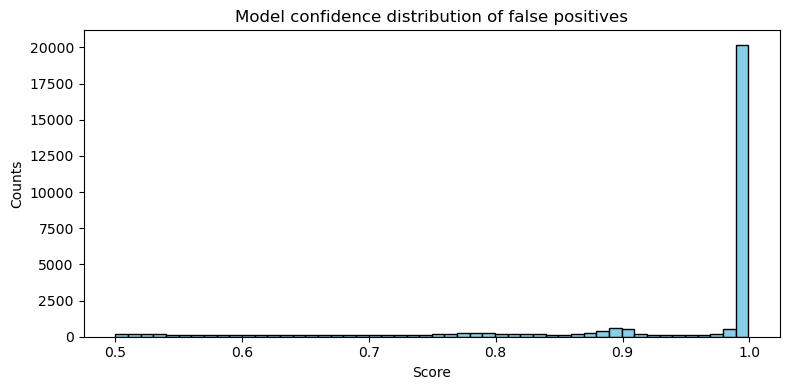

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

fp = pd.read_csv("../../results/false_positives.csv", sep="\t")

# Häufigste Epitope
epitope_counts = fp["Epitope"].value_counts().head(10)

plt.figure(figsize=(8, 4))
plt.hist(fp["score"], bins=50, color="skyblue", edgecolor="black")
plt.title("Model confidence distribution of false positives")
plt.xlabel("Score")
plt.ylabel("Counts")
plt.tight_layout()
plt.show()

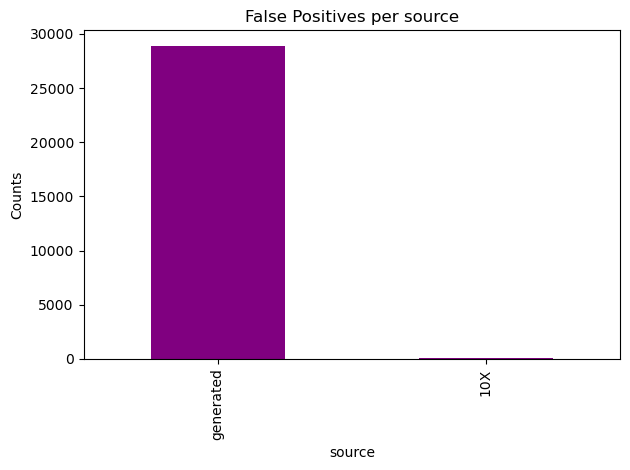

In [14]:
source_counts = fp["source"].value_counts()

source_counts.plot(kind="bar", color="purple")
plt.title("False Positives per source")
plt.ylabel("Counts")
plt.tight_layout()
plt.show()

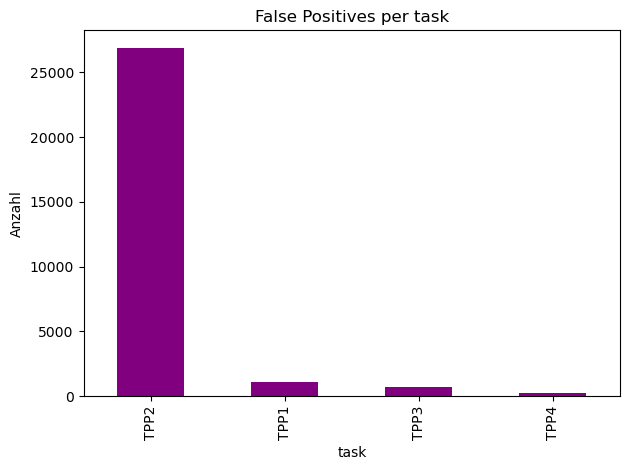

In [21]:
task_counts = fp["task"].value_counts()

task_counts.plot(kind="bar", color="purple")
plt.title("False Positives per task")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

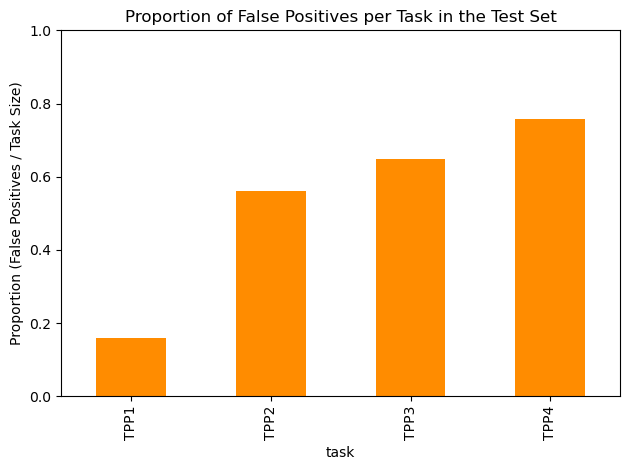

In [24]:
# 1. False Positives pro Task
fp_task_counts = fp["task"].value_counts()

# 2. Alle Testbeispiele pro Task (aus df_test)
test_task_counts = test_df["task"].value_counts()

# 3. Verhältnis: FP-Anteil pro Task
fp_ratio = (fp_task_counts / test_task_counts).sort_index()

# 4. Visualisieren
fp_ratio.plot(kind="bar", color="darkorange")
plt.title("Proportion of False Positives per Task in the Test Set")
plt.ylabel("Proportion (False Positives / Task Size)")
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

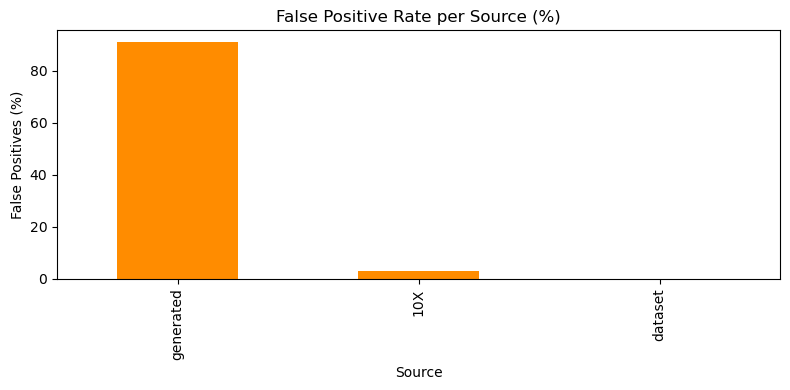

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Einlesen
fp = pd.read_csv("../../results/false_positives.csv", sep="\t")
test_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/test.tsv", sep="\t")

# Gesamtanzahl pro Quelle im gesamten Testset
total_per_source = test_df["source"].value_counts()

# Anzahl der False Positives pro Quelle
fp_per_source = fp["source"].value_counts()

# Prozentuale False Positive Rate pro Quelle
fp_rate_per_source = (fp_per_source / total_per_source * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
fp_rate_per_source.plot(kind="bar", color="darkorange")
plt.title("False Positive Rate per Source (%)")
plt.ylabel("False Positives (%)")
plt.xlabel("Source")
plt.tight_layout()
plt.show()


# Datenanalyse mit neuen Daten am 12.05.

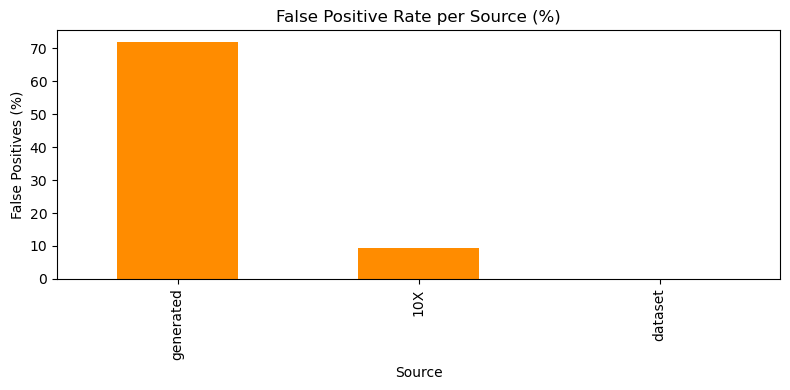

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Einlesen
fp = pd.read_csv("../../results/false_positives_v1oversample.csv", sep="\t")
test_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/test.tsv", sep="\t")

# Gesamtanzahl pro Quelle im gesamten Testset
total_per_source = test_df["source"].value_counts()

# Anzahl der False Positives pro Quelle
fp_per_source = fp["source"].value_counts()

# Prozentuale False Positive Rate pro Quelle
fp_rate_per_source = (fp_per_source / total_per_source * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
fp_rate_per_source.plot(kind="bar", color="darkorange")
plt.title("False Positive Rate per Source (%)")
plt.ylabel("False Positives (%)")
plt.xlabel("Source")
plt.tight_layout()
plt.show()

Anzahl TPP2 False Positives: 17237


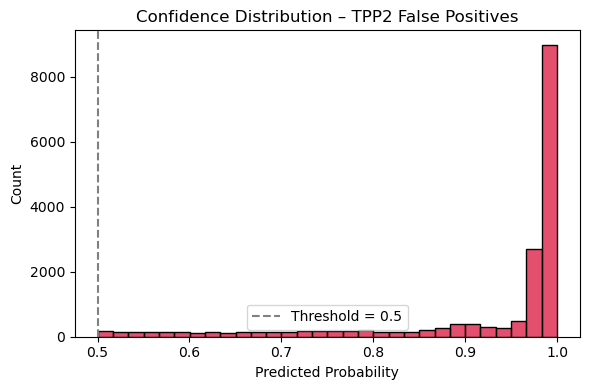


Top Epitope unter TPP2-False-Positives:
 Epitope
CINGVCWTV     2242
GTSGSPIINR    1409
GTSGSPIVNR    1385
KLGGALQAK     1106
KRWIILGLNK    1079
NLVPMVATV     1065
GILGFVFTL      880
GLCTLVAML      767
EIYKRWII       654
FLKEKGGL       601
Name: count, dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen
fp = pd.read_csv("../../results/false_positives_v1oversample.csv", sep="\t")

# Nur TPP2-Fehlklassifikationen
fp_tpp2 = fp[fp["task"] == "TPP2"].copy()
print(f"Anzahl TPP2 False Positives: {len(fp_tpp2)}")

# Confidence Score Verteilung
plt.figure(figsize=(6,4))
sns.histplot(fp_tpp2["predicted_score"], bins=30, color="crimson", edgecolor="black")
plt.title("Confidence Distribution – TPP2 False Positives")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.axvline(0.5, linestyle="--", color="gray", label="Threshold = 0.5")
plt.legend()
plt.tight_layout()
plt.savefig("results/tpp2_fp_confidence_hist.png")
plt.show()

# Top Epitope bei FPs
top_epitopes = fp_tpp2["Epitope"].value_counts().head(10)
print("\nTop Epitope unter TPP2-False-Positives:\n", top_epitopes)

In [11]:
import pandas as pd

# 1. Liste deiner Epitope
fp_epitopes = [
    "CINGVCWTV", "GTSGSPIINR", "GTSGSPIVNR", "KLGGALQAK", "KRWIILGLNK",
    "NLVPMVATV"]

# 2. Trainingsdaten laden
train_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/train.tsv", sep="\t")

# 3. Nur negative Bindungen mit diesen Epitope
negatives_with_epitope = train_df[
    (train_df["Epitope"].isin(fp_epitopes)) &
    (train_df["Binding"] == 0)
]

# 4. Auswertung
counts = negatives_with_epitope["Epitope"].value_counts()
print("\nNegative Bindungen im Training für diese Epitope:")
print(counts)

# Optional: Epitope ohne *jede* negative Instanz
epitopes_with_no_negatives = [e for e in fp_epitopes if e not in counts]
print("\nDiese Epitope hatten KEINE negativen Bindungen im Training:")
print(epitopes_with_no_negatives)


Negative Bindungen im Training für diese Epitope:
Epitope
NLVPMVATV     15912
KLGGALQAK      7394
CINGVCWTV        38
KRWIILGLNK       14
GTSGSPIVNR        1
GTSGSPIINR        1
Name: count, dtype: int64

Diese Epitope hatten KEINE negativen Bindungen im Training:
[]


In [12]:
import pandas as pd

# 1. Liste deiner interessanten Epitope (z. B. aus False Positives)
fp_epitopes = [
    "CINGVCWTV", "GTSGSPIINR", "GTSGSPIVNR", "KLGGALQAK", "KRWIILGLNK",
    "NLVPMVATV"
]

# 2. Validierungsdaten laden
val_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/validation.tsv", sep="\t")

# 3. Nur negative Bindungen mit diesen Epitope
negatives_in_val = val_df[
    (val_df["Epitope"].isin(fp_epitopes)) &
    (val_df["Binding"] == 0)
]

# 4. Auswertung
counts_val = negatives_in_val["Epitope"].value_counts()
print("\nNegative Bindungen in VALIDATION für diese Epitope:")
print(counts_val)

# Optional: Welche Epitope fehlen ganz in den negativen
epitopes_missing_in_val = [e for e in fp_epitopes if e not in counts_val]
print("\nDiese Epitope hatten KEINE negativen Bindungen im Validation:")
print(epitopes_missing_in_val)



Negative Bindungen in VALIDATION für diese Epitope:
Epitope
KLGGALQAK     5116
NLVPMVATV     1581
CINGVCWTV      802
GTSGSPIINR       1
GTSGSPIVNR       1
Name: count, dtype: int64

Diese Epitope hatten KEINE negativen Bindungen im Validation:
['KRWIILGLNK']


/tmp/ipykernel_79851/772175817.py:10: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  val_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/validation.tsv", sep="\t")


In [42]:
import pandas as pd

# Liste der Ziel-Epitope

search_epitopes_tpp1 = [
    "CINGVCWTV", "GTSGSPIVNR", "GTSGSPIINR", "NLVPMVATV", "KLGGALQAK",
    "GILGFVFTL", "AVFDRKSDAK", "GTSGSPIIDK", "GLCTLVAML", "KRWIILGLNK",
    "RPHERNGFTVL", "VTEHDTLLY", "RAKFKQLL", "QYIKWPWYI", "EIYKRWII",
    "FLKEKGGL", "TPRVTGGGAM", "TSTLQEQIGW", "ELAGIGILTV", "YSEHPTFTSQY",
    "LLFGYPVYV", "KRWIIMGLNK", "IPSINVHHY", "YLQPRTFLL", "HPVGEADYFEY",
    "RPPIFIRRL", "TPQDLNTML", "RLQSLQTYV", "TPGPGVRYPL", "MLNIPSINV",
    "TDLGQNLLY", "IVTDFSVIK", "KAFSPEVIPMF", "GADGVGKSAL", "NYNYLYRLF",
    "LLWNGPMAV", "FLRGRAYGL", "QIKVRVKMV", "ISPRTLNAW", "AMFWSVPTV",
    "ILHCANFNV", "IQPGQTFSV", "LPEPLPQGQLTAY", "RQLLFVVEV", "YVLDHLIVV",
    "GLNKIVRMY", "ALTPVVVTL", "SLLMWITQC", "RYPLTFGWCF", "ELRRKMMYM"
]


search_epitopes_tpp2 = [
    "CINGVCWTV", "GTSGSPIINR", "GTSGSPIVNR", "KLGGALQAK", "KRWIILGLNK",
    "NLVPMVATV", "GILGFVFTL", "GLCTLVAML", "EIYKRWII", "FLKEKGGL",
    "GTSGSPIIDK", "AVFDRKSDAK", "QYIKWPWYI", "YSEHPTFTSQY", "YLQPRTFLL",
    "TSTLQEQIGW", "KAFSPEVIPMF", "TPQDLNTML", "ELAGIGILTV", "KRWIIMGLNK",
    "TPGPGVRYPL", "RAKFKQLL", "RLQSLQTYV", "MLNIPSINV", "TPRVTGGGAM",
    "LLWNGPMAV", "NLSALGIFST", "HPVGEADYFEY", "ISPRTLNAW", "LLHGFSFYL",
    "TDLGQNLLY", "RLPGVLPRA", "LPPIVAKEI", "YVLDHLIVV", "QASQEVKNW",
    "FPRPWLHGL", "YILKYSVFL", "APRGPHGGAASGL", "NYNYLYRLF", "QIKVRVKMV",
    "KLVALGINAV", "SLYNTVATL", "HPKVSSEVHI", "DATYQRTRALVR", "RYSIFFDYM",
    "IIKDYGKQM", "KTFPPTEPK", "GADGVGKSAL", "RLSDFSEQL", "EAAGIGILTV"
]


search_epitopes = search_epitopes_tpp1 + search_epitopes_tpp2 

def get_binding_stats(filepath, label):
    df = pd.read_csv(filepath, sep="\t")
    filtered = df[df["Epitope"].isin(search_epitopes)]
    result = (
        filtered.groupby(["Epitope", "Binding"])
        .size()
        .unstack(fill_value=0)
        .rename(columns={0: "Binding_0", 1: "Binding_1"})
    )
    result["Total"] = result["Binding_0"] + result["Binding_1"]
    result["Ratio_Binding1"] = result["Binding_1"] / result["Total"]

    # Fehlende Epitope ergänzen
    for epitope in search_epitopes:
        if epitope not in result.index:
            result.loc[epitope] = [0, 0, 0, 0.0]

    print(f"\n📊 {label} Binding-Statistik:")
    print(result[["Binding_1", "Binding_0", "Total", "Ratio_Binding1"]].sort_index())
    return result

# Dateipfade definieren
train_path = f"{pipeline_data_splitted}/{precision}/beta/train.tsv"
test_path = f"{pipeline_data_splitted}/{precision}/beta/test.tsv"

# Statistik je Datensatz
train_stats = get_binding_stats(train_path, "TRAIN")
test_stats = get_binding_stats(test_path, "TEST")

# Berechnung: Wie viele Binding=0 fehlen im Train, um das Testverhältnis zu erreichen
adjustments = pd.DataFrame(index=search_epitopes, columns=["Add_Binding_0_Needed"])

for epitope in search_epitopes:
    b1_train = train_stats.at[epitope, "Binding_1"]
    b0_train = train_stats.at[epitope, "Binding_0"]
    b1_test = test_stats.at[epitope, "Binding_1"]
    b0_test = test_stats.at[epitope, "Binding_0"]

    total_test = b1_test + b0_test
    if total_test == 0:
        # Keine Daten im Test vorhanden → keine Zielratio → keine Anpassung
        adjustments.loc[epitope] = 0
        continue

    target_ratio = b1_test / total_test

    # Berechne nötige zusätzliche Binding=0 im Train
    if target_ratio == 0:
        x_needed = 0
    else:
        x_needed = int(round((b1_train / target_ratio) - b1_train - b0_train))
        x_needed = max(0, x_needed)

    adjustments.loc[epitope] = x_needed

adjustments["Add_Binding_0_Needed"] = adjustments["Add_Binding_0_Needed"].astype(int)
adjustments_sorted = adjustments.sort_values(by="Add_Binding_0_Needed", ascending=False)

# Ausgabe
pd.set_option("display.max_rows", 100)  # Anzahl der angezeigten Zeilen erhöhen
print("\n➕ Zusätzliche Binding=0 Beispiele pro Epitope nötig im TRAIN (sortiert):")
print(adjustments_sorted)



📊 TRAIN Binding-Statistik:
Binding        Binding_1  Binding_0    Total  Ratio_Binding1
Epitope                                                     
ALTPVVVTL            5.0        1.0      6.0        0.833333
AMFWSVPTV          104.0       11.0    115.0        0.904348
APRGPHGGAASGL        1.0        1.0      2.0        0.500000
AVFDRKSDAK         373.0     6804.0   7177.0        0.051972
CINGVCWTV           85.0       38.0    123.0        0.691057
...                  ...        ...      ...             ...
VTEHDTLLY          285.0     6535.0   6820.0        0.041789
YILKYSVFL            9.0        1.0     10.0        0.900000
YLQPRTFLL          722.0      204.0    926.0        0.779698
YSEHPTFTSQY        108.0       22.0    130.0        0.830769
YVLDHLIVV         8340.0    35476.0  43816.0        0.190341

[67 rows x 4 columns]

📊 TEST Binding-Statistik:
Binding        Binding_1  Binding_0  Total  Ratio_Binding1
Epitope                                                   
ALTPVVVTL  

## TPP1

Anzahl TPP2 False Positives: 1231


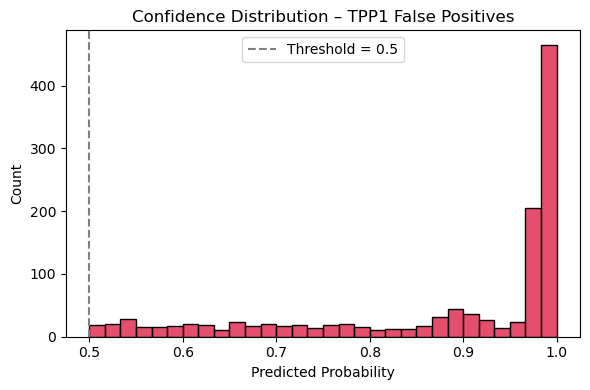


Top Epitope unter TPP1-False-Positives:
 Epitope
CINGVCWTV        199
GTSGSPIVNR       131
GTSGSPIINR       121
NLVPMVATV        115
KLGGALQAK         91
GILGFVFTL         78
AVFDRKSDAK        72
GTSGSPIIDK        45
GLCTLVAML         44
KRWIILGLNK        38
RPHERNGFTVL       37
VTEHDTLLY         29
RAKFKQLL          25
QYIKWPWYI         22
EIYKRWII          22
FLKEKGGL          20
TPRVTGGGAM        20
TSTLQEQIGW        20
ELAGIGILTV        12
YSEHPTFTSQY       11
LLFGYPVYV          8
KRWIIMGLNK         7
IPSINVHHY          5
YLQPRTFLL          4
HPVGEADYFEY        4
RPPIFIRRL          4
TPQDLNTML          3
RLQSLQTYV          3
TPGPGVRYPL         3
MLNIPSINV          3
TDLGQNLLY          2
IVTDFSVIK          2
KAFSPEVIPMF        2
GADGVGKSAL         2
NYNYLYRLF          2
LLWNGPMAV          2
FLRGRAYGL          2
QIKVRVKMV          1
ISPRTLNAW          1
AMFWSVPTV          1
ILHCANFNV          1
IQPGQTFSV          1
LPEPLPQGQLTAY      1
RQLLFVVEV          1
YVLDHLIVV          1
GLNKI

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen
fp = pd.read_csv("../../results/false_positives_v1oversample.csv", sep="\t")

# Nur TPP2-Fehlklassifikationen
fp_tpp2 = fp[fp["task"] == "TPP1"].copy()
print(f"Anzahl TPP2 False Positives: {len(fp_tpp2)}")

# Confidence Score Verteilung
plt.figure(figsize=(6,4))
sns.histplot(fp_tpp2["predicted_score"], bins=30, color="crimson", edgecolor="black")
plt.title("Confidence Distribution – TPP1 False Positives")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.axvline(0.5, linestyle="--", color="gray", label="Threshold = 0.5")
plt.legend()
plt.tight_layout()
plt.savefig("results/tpp2_fp_confidence_hist.png")
plt.show()

# Top Epitope bei FPs
top_epitopes = fp_tpp2["Epitope"].value_counts().head(50)
print("\nTop Epitope unter TPP1-False-Positives:\n", top_epitopes)

In [44]:
import pandas as pd
import numpy as np

# Lade das Trainingsset
train_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/train.tsv", sep="\t")

# Dictionary: Epitope → Anzahl im Trainingsset
epitope_counts = {
    "RQLLFVVEV": 7327,
    "VTEHDTLLY": 3060,
    "KTFPPTEPK": 1677,
    "YLQPRTFLL": 1120,
    "YSEHPTFTSQY": 847,
    "CINGVCWTV": 784,
    "EAAGIGILTV": 648,
    "QYIKWPWYI": 541,
    "RYPLTFGWCF": 434,
    "HPVGEADYFEY": 402,
    "AMFWSVPTV": 322,
    "LLWNGPMAV": 318,
    "GLCTLVAML": 282,
    "DATYQRTRALVR": 281,
    "NYNYLYRLF": 244,
    "KRWIILGLNK": 227,
    "FPRPWLHGL": 217,
    "QIKVRVKMV": 195,
    "KAFSPEVIPMF": 184,
    "TPGPGVRYPL": 172,
    "EIYKRWII": 166,
    "NLVPMVATV": 164,
    "HPKVSSEVHI": 120,
    "LLHGFSFYL": 102,
    "RLQSLQTYV": 97,
    "RLPGVLPRA": 77,
    "TDLGQNLLY": 76,
    "TSTLQEQIGW": 68,
    "YILKYSVFL": 45,
    "FLKEKGGL": 39,
    "NLSALGIFST": 38,
    "GTSGSPIINR": 28,
    "KRWIIMGLNK": 22,
    "GTSGSPIIDK": 20,
    "SLLMWITQC": 20,
    "RLSDFSEQL": 18,
    "GTSGSPIVNR": 17,
    "ISPRTLNAW": 14,
    "APRGPHGGAASGL": 13,
    "LPEPLPQGQLTAY": 12,
    "ALTPVVVTL": 11,
    "MLNIPSINV": 6,
    "QASQEVKNW": 5
}


# Liste der Epitope, für die augmentiert werden soll
epitopes_to_augment = list(epitope_counts.keys())

augmented = []
for epitope in epitopes_to_augment:
    used_tcrs = train_df[train_df["Epitope"] == epitope]["TRB_CDR3"].unique()
    candidate_tcrs = train_df[~train_df["TRB_CDR3"].isin(used_tcrs)]["TRB_CDR3"].unique()

    num_to_generate = epitope_counts[epitope] * 5  # dynamische Zielgröße

    # Falls nicht genügend TCRs verfügbar sind, mit replacement ziehen
    replace = len(candidate_tcrs) < num_to_generate
    sampled = np.random.choice(candidate_tcrs, size=num_to_generate, replace=replace)

    df = pd.DataFrame({
        "TRB_CDR3": sampled,
        "Epitope": [epitope] * num_to_generate,
        "Binding": [0] * num_to_generate,
        "source": ["augmented"] * num_to_generate
    })

    augmented.append(df)

# Alle augmentierten Beispiele zusammenfügen und speichern
augmented_negatives = pd.concat(augmented, ignore_index=True)
augmented_negatives.to_csv("augmented_negatives_tpp1250.tsv", sep="\t", index=False)
print("✅ Speichern abgeschlossen.")

✅ Speichern abgeschlossen.


In [45]:
import pandas as pd

# Lade augmentierte negative Beispiele
aug_neg = pd.read_csv("augmented_negatives_tpp1250.tsv", sep="\t")

# Nur positive Bindungen aus allen Splits
pos_train = train[train["Binding"] == 1]
pos_val = val[val["Binding"] == 1]
pos_test = test[test["Binding"] == 1]

# Kombiniere alle positiven Paare
positive_pairs = pd.concat([pos_train, pos_val, pos_test])[["TRB_CDR3", "Epitope"]].drop_duplicates()

# Prüfe Überschneidung
merged = aug_neg.merge(positive_pairs, on=["TRB_CDR3", "Epitope"], how="inner")

# Ergebnis anzeigen
print(f"⚠️ {len(merged)} augmentierte Negative kommen auch als Positive im Dataset vor!")
if not merged.empty:
    print(merged.head())

/tmp/ipykernel_104240/3071052388.py:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  val   = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/validation.tsv", sep="\t")


⚠️ 14 augmentierte Negative kommen auch als Positive im Dataset vor!
           TRB_CDR3    Epitope  Binding     source
0       CASSPAYEQYF  RQLLFVVEV        0  augmented
1   CASSTGPTGLYEQYF  RQLLFVVEV        0  augmented
2       CASSQNNEQFF  RQLLFVVEV        0  augmented
3  CASSPPTGLSYNEQFF  RQLLFVVEV        0  augmented
4       CASSVGNTIYF  RQLLFVVEV        0  augmented


In [46]:
# Augmentierte Daten laden
aug_file = "augmented_negatives_tpp1250.tsv"
aug_df = pd.read_csv(aug_file, sep="\t")

# Kombiniere positive Bindungen aus allen Splits
all_pos = pd.concat([train, val, test])
all_pos = all_pos[all_pos["Binding"] == 1][["TRB_CDR3", "Epitope"]]

# Entferne augmentierte Paare, die auch als positive vorkommen
cleaned_aug_df = pd.merge(aug_df, all_pos, on=["TRB_CDR3", "Epitope"], how="left", indicator=True)
cleaned_aug_df = cleaned_aug_df[cleaned_aug_df["_merge"] == "left_only"].drop(columns="_merge")

# Speichern
cleaned_aug_df.to_csv("augmented_negatives_tpp1250.tsv", sep="\t", index=False)
print(f"✅ Gesäubert gespeichert: {len(cleaned_aug_df)} Einträge verbleiben.")

✅ Gesäubert gespeichert: 102286 Einträge verbleiben.


In [16]:
# Top Epitope bei FPs
top_epitopes = fp_tpp2["TRB_CDR3"].value_counts().head(10)
print("\nTop Epitope unter TPP2-False-Positives:\n", top_epitopes)


Top Epitope unter TPP2-False-Positives:
 TRB_CDR3
CASSYRGGRAGETQYF    9
CATSDNNVWFSEQFF     9
CASSFDGVYEQYF       9
CASSAGSGNEQYF       9
CASSLGQGLLYGYTF     9
CASSQGLAGAGELFF     9
CASSLGGGLQETQYF     8
CASSLGLEGEQYF       8
CASSLGPEKEQFF       8
CASSFGAGSQETQYF     8
Name: count, dtype: int64


In [30]:
#####TPP2 >> wenig Epitope künstlich vergrössern mit negativen Beispielen
train_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/train.tsv", sep="\t")

# Liste mit zu wenig negativen Beispielen
rare_epitopes = ["CINGVCWTV", "GTSGSPIINR", "GTSGSPIVNR"]

augmented = []
for epitope in rare_epitopes:
    used_tcrs = train_df[train_df["Epitope"] == epitope]["TRB_CDR3"].unique()
    candidate_tcrs = train_df[~train_df["TRB_CDR3"].isin(used_tcrs)]["TRB_CDR3"].unique()

    num_to_generate = 1000  
    sampled = np.random.choice(candidate_tcrs, size=num_to_generate, replace=False)

    df = pd.DataFrame({
        "TRB_CDR3": sampled,
        "Epitope": [epitope] * num_to_generate,
        "Binding": [0] * num_to_generate,
        "source": ["augmented"] * num_to_generate
    })

    augmented.append(df)

augmented_negatives = pd.concat(augmented, ignore_index=True)
augmented_negatives.to_csv("augmented_negatives_tpp2.tsv", sep="\t", index=False)
print("✅ Speichern abgeschlossen.")


✅ Speichern abgeschlossen.


In [35]:
import pandas as pd

# Lade augmentierte negative Beispiele
aug_neg = pd.read_csv("augmented_negatives_tpp2.tsv", sep="\t")

# Lade originale Datasets
train = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/train.tsv", sep="\t")
val   = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/validation.tsv", sep="\t")
test  = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/test.tsv", sep="\t")

# Nur positive Bindungen aus allen Splits
pos_train = train[train["Binding"] == 1]
pos_val = val[val["Binding"] == 1]
pos_test = test[test["Binding"] == 1]

# Kombiniere alle positiven Paare
positive_pairs = pd.concat([pos_train, pos_val, pos_test])[["TRB_CDR3", "Epitope"]].drop_duplicates()

# Prüfe Überschneidung
merged = aug_neg.merge(positive_pairs, on=["TRB_CDR3", "Epitope"], how="inner")

# Ergebnis anzeigen
print(f"⚠️ {len(merged)} augmentierte Negative kommen auch als Positive im Dataset vor!")
if not merged.empty:
    print(merged.head())

/tmp/ipykernel_21340/1019784861.py:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  val   = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/validation.tsv", sep="\t")


⚠️ 0 augmentierte Negative kommen auch als Positive im Dataset vor!


In [34]:
# Augmentierte Daten laden
aug_file = "augmented_negatives_tpp2.tsv"
aug_df = pd.read_csv(aug_file, sep="\t")

# Train/Val/Test einlesen
train = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/train.tsv", sep="\t")
val = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/validation.tsv", sep="\t")
test = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/test.tsv", sep="\t")

# Kombiniere positive Bindungen aus allen Splits
all_pos = pd.concat([train, val, test])
all_pos = all_pos[all_pos["Binding"] == 1][["TRB_CDR3", "Epitope"]]

# Entferne augmentierte Paare, die auch als positive vorkommen
cleaned_aug_df = pd.merge(aug_df, all_pos, on=["TRB_CDR3", "Epitope"], how="left", indicator=True)
cleaned_aug_df = cleaned_aug_df[cleaned_aug_df["_merge"] == "left_only"].drop(columns="_merge")

# Speichern
cleaned_aug_df.to_csv("augmented_negatives_tpp2.tsv", sep="\t", index=False)
print(f"✅ Gesäubert gespeichert: {len(cleaned_aug_df)} Einträge verbleiben.")

/tmp/ipykernel_21340/899999213.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  val = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/validation.tsv", sep="\t")


✅ Gesäubert gespeichert: 2997 Einträge verbleiben.


## Datenanalse mit augmented data 1000

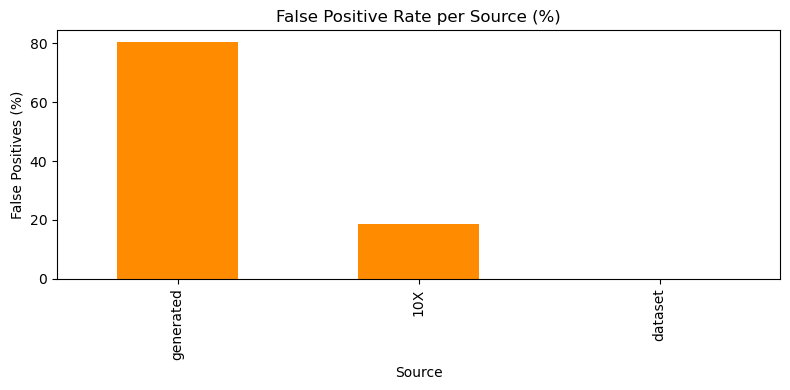

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Einlesen
fp = pd.read_csv("../../results/false_positives_v1frbce_aug1000.csv", sep="\t")
test_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/test.tsv", sep="\t")

# Gesamtanzahl pro Quelle im gesamten Testset
total_per_source = test_df["source"].value_counts()

# Anzahl der False Positives pro Quelle
fp_per_source = fp["source"].value_counts()

# Prozentuale False Positive Rate pro Quelle
fp_rate_per_source = (fp_per_source / total_per_source * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
fp_rate_per_source.plot(kind="bar", color="darkorange")
plt.title("False Positive Rate per Source (%)")
plt.ylabel("False Positives (%)")
plt.xlabel("Source")
plt.tight_layout()
plt.show()

Anzahl TPP2 False Positives: 20011


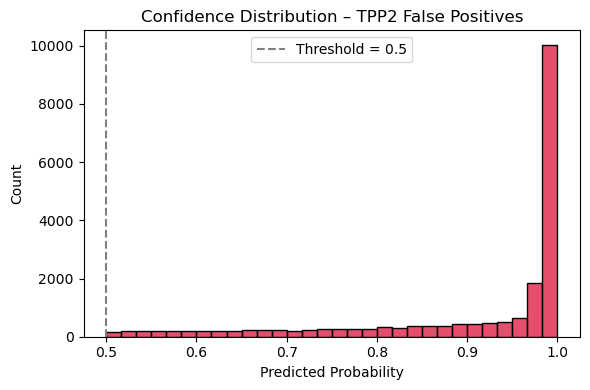


Top Epitope unter TPP2-False-Positives:
 Epitope
CINGVCWTV     2246
KLGGALQAK     1637
GTSGSPIINR    1410
GTSGSPIVNR    1385
GLCTLVAML     1314
KRWIILGLNK    1081
NLVPMVATV     1071
ELAGIGILTV     909
GILGFVFTL      885
AVFDRKSDAK     860
Name: count, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen
fp = pd.read_csv("../../results/false_positives_v1frbce_aug1000.csv", sep="\t")

# Nur TPP2-Fehlklassifikationen
fp_tpp2 = fp[fp["task"] == "TPP2"].copy()
print(f"Anzahl TPP2 False Positives: {len(fp_tpp2)}")

# Confidence Score Verteilung
plt.figure(figsize=(6,4))
sns.histplot(fp_tpp2["predicted_score"], bins=30, color="crimson", edgecolor="black")
plt.title("Confidence Distribution – TPP2 False Positives")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.axvline(0.5, linestyle="--", color="gray", label="Threshold = 0.5")
plt.legend()
plt.tight_layout()
plt.show()

# Top Epitope bei FPs
top_epitopes = fp_tpp2["Epitope"].value_counts().head(10)
print("\nTop Epitope unter TPP2-False-Positives:\n", top_epitopes)

# Datenanalyse mit augemnted Data Top10

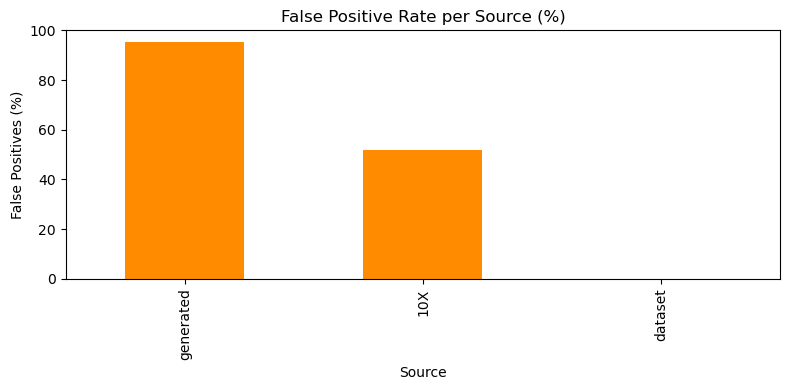

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Einlesen
fp = pd.read_csv("../../results/false_positives_v1frbce_aug10.csv", sep="\t")
test_df = pd.read_csv(f"{pipeline_data_splitted}/{precision}/beta/test.tsv", sep="\t")

# Gesamtanzahl pro Quelle im gesamten Testset
total_per_source = test_df["source"].value_counts()

# Anzahl der False Positives pro Quelle
fp_per_source = fp["source"].value_counts()

# Prozentuale False Positive Rate pro Quelle
fp_rate_per_source = (fp_per_source / total_per_source * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
fp_rate_per_source.plot(kind="bar", color="darkorange")
plt.title("False Positive Rate per Source (%)")
plt.ylabel("False Positives (%)")
plt.xlabel("Source")
plt.tight_layout()
plt.show()

Anzahl TPP2 False Positives: 24368


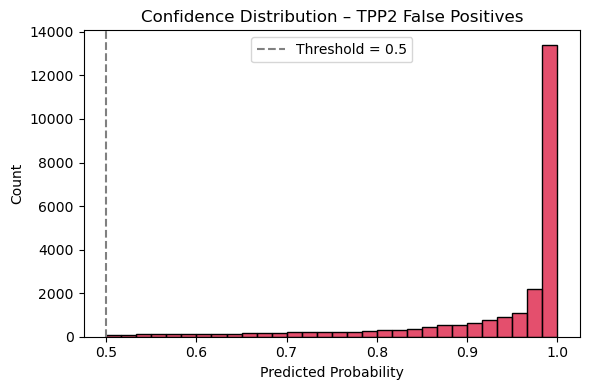


Top Epitope unter TPP2-False-Positives:
 Epitope
ELAGIGILTV    3277
CINGVCWTV     2246
GLCTLVAML     2211
KLGGALQAK     1871
GTSGSPIINR    1410
GTSGSPIVNR    1385
KRWIILGLNK    1081
NLVPMVATV     1078
AVFDRKSDAK     918
GILGFVFTL      886
Name: count, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen
fp = pd.read_csv("../../results/false_positives_v1frbce_aug10.csv", sep="\t")

# Nur TPP2-Fehlklassifikationen
fp_tpp2 = fp[fp["task"] == "TPP2"].copy()
print(f"Anzahl TPP2 False Positives: {len(fp_tpp2)}")

# Confidence Score Verteilung
plt.figure(figsize=(6,4))
sns.histplot(fp_tpp2["predicted_score"], bins=30, color="crimson", edgecolor="black")
plt.title("Confidence Distribution – TPP2 False Positives")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.axvline(0.5, linestyle="--", color="gray", label="Threshold = 0.5")
plt.legend()
plt.tight_layout()
plt.show()

# Top Epitope bei FPs
top_epitopes = fp_tpp2["Epitope"].value_counts().head(10)
print("\nTop Epitope unter TPP2-False-Positives:\n", top_epitopes)

In [8]:
# CSV einlesen
fp = pd.read_csv("../../results/false_positives_v1frbce_aug10.csv", sep="\t")

# Nur TPP2-Fehlklassifikationen
fp_tpp2 = fp[fp["task"] == "TPP2"].copy()
print(f"Anzahl TPP2 False Positives: {len(fp_tpp2)}")

# Top 10 Epitope
top_epitopes = fp_tpp2["Epitope"].value_counts().head(10)
print("\nTop Epitope unter TPP2-False-Positives:\n", top_epitopes)

# Quelle + Anzahl für Top-10 Epitope
top10_list = top_epitopes.index.tolist()

# Filter auf nur Top-10 Epitope
filtered = fp_tpp2[fp_tpp2["Epitope"].isin(top10_list)]

# Gruppierung und Zählung
epitope_source_counts = (
    filtered
    .groupby(["Epitope", "source"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Epitope", "Count"], ascending=[True, False])
)

# Ausgabe
print("\nTop-10 Epitope – Source-Verteilung:")
for epitope in top10_list:
    subset = epitope_source_counts[epitope_source_counts["Epitope"] == epitope]
    print(f"\n• {epitope}:")
    for _, row in subset.iterrows():
        print(f"    {row['source']}: {row['Count']}")

Anzahl TPP2 False Positives: 24368

Top Epitope unter TPP2-False-Positives:
 Epitope
ELAGIGILTV    3277
CINGVCWTV     2246
GLCTLVAML     2211
KLGGALQAK     1871
GTSGSPIINR    1410
GTSGSPIVNR    1385
KRWIILGLNK    1081
NLVPMVATV     1078
AVFDRKSDAK     918
GILGFVFTL      886
Name: count, dtype: int64

Top-10 Epitope – Source-Verteilung:

• ELAGIGILTV:
    generated: 3272
    10X: 5

• CINGVCWTV:
    generated: 2246

• GLCTLVAML:
    generated: 2205
    10X: 6

• KLGGALQAK:
    generated: 1867
    10X: 4

• GTSGSPIINR:
    generated: 1410

• GTSGSPIVNR:
    generated: 1385

• KRWIILGLNK:
    generated: 1081

• NLVPMVATV:
    generated: 1071
    10X: 7

• AVFDRKSDAK:
    generated: 914
    10X: 4

• GILGFVFTL:
    generated: 880
    10X: 6


In [10]:
# Nur TPP2-False Positives mit Source = '10X'
fp_tpp2_10x = fp_tpp2[fp_tpp2["source"] == "10X"]

# Top 10 Epitope nach Anzahl der False Positives aus 10X
top10_10x = fp_tpp2_10x["Epitope"].value_counts().head(10)

print("Top 10 False Positives aus Source '10X':\n")
for epitope, count in top10_10x.items():
    print(f"• {epitope}: {count}")


Top 10 False Positives aus Source '10X':

• CLGGLLTMV: 8
• RTLNAWVKV: 7
• NLVPMVATV: 7
• LLFGYPVYV: 6
• IVTDFSVIK: 6
• IMDQVPFSV: 6
• GILGFVFTL: 6
• GLCTLVAML: 6
• RAKFKQLL: 6
• FLASKIGRLV: 6


In [5]:
pipeline_data = '../../../../data'
pipeline_data_plain = f'{pipeline_data}/plain_datasets'
pipeline_data_cleaned = f'{pipeline_data}/cleaned_datasets'
pipeline_data_concatenated = f'{pipeline_data}/concatenated_datasets'
pipeline_data_splitted = f'{pipeline_data}/splitted_datasets'
pipeline_data_temp_bucket = f'{pipeline_data}/temp'
precision = "allele"

import pandas as pd
base_path = f"{pipeline_data_splitted}/{precision}/beta/new"

train_path = f"{base_path}/train.tsv"
val_path = f"{base_path}/validation.tsv"
test_path = f"{base_path}/test.tsv"

# Dateien einlesen
train_df = pd.read_csv(train_path, sep='\t')
val_df = pd.read_csv(val_path, sep='\t')
test_df = pd.read_csv(test_path, sep='\t')

# Nach 10X filtern
train_10x = train_df[train_df["source"] == "10X"]
val_10x = val_df[val_df["source"] == "10X"]
test_10x = test_df[test_df["source"] == "10X"]

# Aufgabenverteilung anzeigen
print("10X Task-Verteilung in TRAIN:")
print(train_10x["source"].value_counts())

print("10X Task-Verteilung in VALIDATION:")
print(val_10x["task"].value_counts())

print("\n10X Task-Verteilung in TEST:")
print(test_10x["task"].value_counts())

# Optional: Sicherstellen, welche TCRs aus dem Training in Val/Test vorkommen
train_tcrs = set(train_10x["TRB_CDR3"])  # oder auch cdr3a je nach Aufbau
val_shared = val_10x[val_10x["TRB_CDR3"].isin(train_tcrs)]
test_shared = test_10x[test_10x["TRB_CDR3"].isin(train_tcrs)]

print(f"\nAnzahl 10X Validation-Einträge mit TCRs auch im Training: {len(val_shared)}")
print(f"Anzahl 10X Test-Einträge mit TCRs auch im Training: {len(test_shared)}")


/tmp/ipykernel_1988/2859151189.py:17: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, sep='\t')
/tmp/ipykernel_1988/2859151189.py:18: DtypeWarning: Columns (1,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  val_df = pd.read_csv(val_path, sep='\t')


10X Task-Verteilung in TRAIN:
source
10X    316157
Name: count, dtype: int64
10X Task-Verteilung in VALIDATION:
task
TPP1    78164
TPP2     1271
Name: count, dtype: int64

10X Task-Verteilung in TEST:
task
TPP1    15609
TPP2       98
Name: count, dtype: int64

Anzahl 10X Validation-Einträge mit TCRs auch im Training: 78075
Anzahl 10X Test-Einträge mit TCRs auch im Training: 15413


In [19]:
import pandas as pd
beta = pd.read_csv(f'{pipeline_data_plain}/10x/combined_output_with_epitope_mhc_TRB_only_expanded-all.csv', sep=',')
beta = beta.drop_duplicates(subset=["Epitope", "TRB_CDR3", "Binding"])
print(f"Anzahl der Einträge (Zeilen): {len(beta)}")


Anzahl der Einträge (Zeilen): 3881388


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
def analyze_source_distribution(df, name):
    print(f"\n📊 {name} – Verteilung nach 'source':\n")
    
    abs_counts = df['source'].value_counts()
    rel_counts = df['source'].value_counts(normalize=True) * 100
    
    summary = pd.DataFrame({
        'Anzahl': abs_counts,
        'Prozent': rel_counts.round(2)
    })
    
    print(summary)

# Analyse durchführen
analyze_source_distribution(train_df, "Train")
analyze_source_distribution(val_df, "Validation")
analyze_source_distribution(test_df, "Test")


📊 Train – Verteilung nach 'source':

           Anzahl  Prozent
source                    
10X        316157    41.83
generated  313315    41.46
dataset    126286    16.71

📊 Validation – Verteilung nach 'source':

           Anzahl  Prozent
source                    
10X         79435    46.99
generated   61444    36.35
dataset     28150    16.65

📊 Test – Verteilung nach 'source':

           Anzahl  Prozent
source                    
generated   29688    54.85
10X         15707    29.02
dataset      8731    16.13
